In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
%matplotlib inline

# Coris data analysis
## We carry out multiple regression using coris data. In the model, we use ldl level as an outcome variable and age, tobacco, alcohol, adiposity, and obesity as predictors.

In [4]:
df = pd.read_csv('coris.txt', sep=',', skiprows=[0, 1])
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


# Linear regression
## In this analysis, we use ldl as an outcome variable and age, tobacco, alcohol, adiposity, and obesity as predictors.
• Do predictors explain the ldl level?  
• How much the ldl level would increase if the level of adiposity increases one unit?  
• Which predictor is most significantly associated with ldl?  
• Is obesity significantly associated with ldl?  

In [6]:
df['intercept'] = 1
Y = df['ldl']
X = df[['intercept', 'age', 'tobacco', 'alcohol', 'adiposity', 'obesity']]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ldl   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     23.51
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           4.85e-21
Time:                        13:30:00   Log-Likelihood:                -938.40
No. Observations:                 462   AIC:                             1889.
Df Residuals:                     456   BIC:                             1914.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3032      0.615      2.119      0.035       0.095       2.512
age            0.0087      0.008      1.032      0.303      -0.008       0.025
tobacco        0.0173      0.021      0.807      0.420      -0.025       0.059
alcohol       -0.0073      0.004     -2.023      0.044      -0.014      -0.000
adiposity      0.0962      0.020      4.710      0.000       0.056       0.136
obesity        0.0262      0.031      0.851      0.395      -0.034       0.087
==============================================================================
Omnibus:                      140.322   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.529
Skew:                           1.382   Prob(JB):                    1.10e-102
Kurtosis:                       7.093   Cond. No.                         436.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### If adiposity is removed from the model, how the result looks like?

In [7]:
X = df[['intercept', 'age', 'tobacco', 'alcohol', 'obesity']]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ldl   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     22.78
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           3.51e-17
Time:                        13:30:24   Log-Likelihood:                -949.37
No. Observations:                 462   AIC:                             1909.
Df Residuals:                     457   BIC:                             1929.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0451      0.567      0.080      0.937      -1.068       1.159
age            0.0318      0.007      4.521      0.000       0.018       0.046
tobacco        0.0183      0.022      0.836      0.403      -0.025       0.061
alcohol       -0.0066      0.004     -1.785      0.075      -0.014       0.001
obesity        0.1298      0.022      5.910      0.000       0.087       0.173
==============================================================================
Omnibus:                      144.736   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.346
Skew:                           1.440   Prob(JB):                    2.70e-103
Kurtosis:                       7.031   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual plots
### To check whether linear regression assumptions are satisfied, draw residual plots

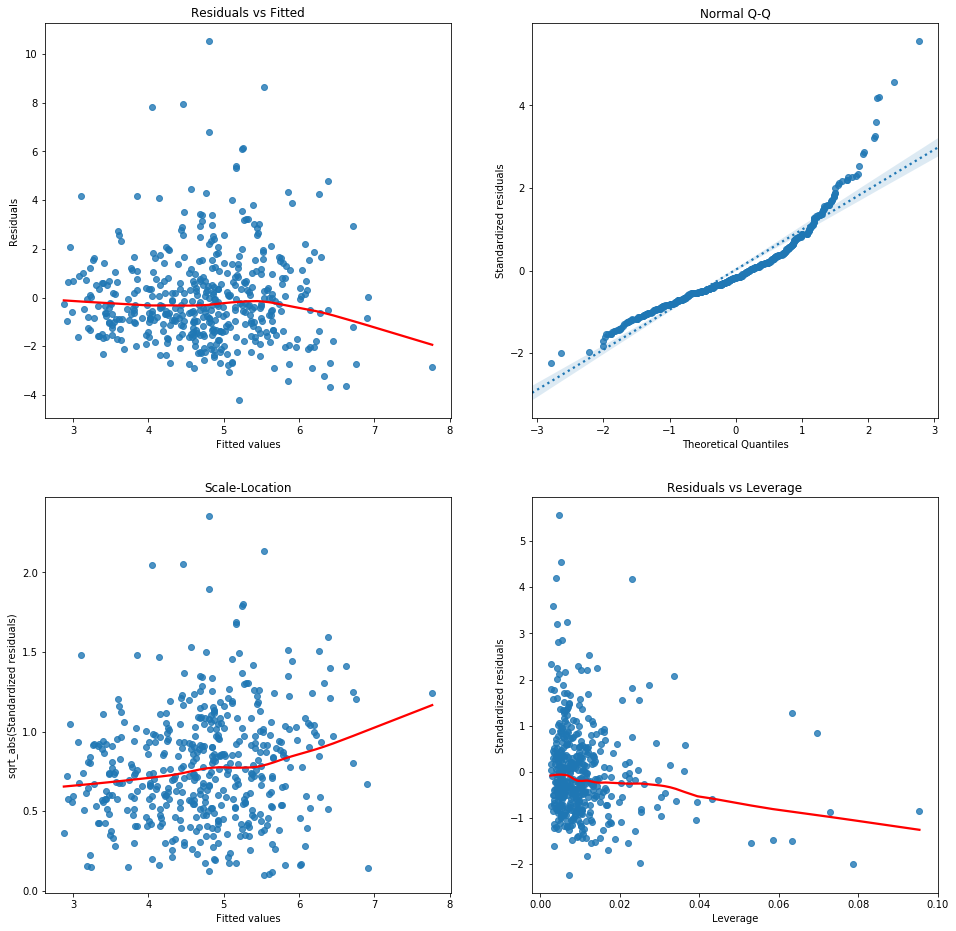

In [30]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
sns.regplot(model.fittedvalues, model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

plt.subplot(2, 2, 2)
norm = np.random.normal(size=len(studentized_resid))
sns.regplot(np.sort(norm), np.sort(studentized_resid), line_kws={'linestyle': ':'})
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')
plt.title('Normal Q-Q');

plt.subplot(2, 2, 3)
studentized_resid = model.get_influence().resid_studentized_internal
sns.regplot(model.fittedvalues, np.sqrt(np.abs(studentized_resid)), lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('sqrt_abs(Standardized residuals)')
plt.title('Scale-Location');

plt.subplot(2, 2, 4)
leverage = model.get_influence().hat_matrix_diag
sns.regplot(leverage, studentized_resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

# Logistic regression
## Now we consider chd as the outcome and age, sbp, tobacco, ldl, adiposity, famhist, obesity and alcohol as predictor. Fit the logistic regression model.

In [31]:
Y = df['chd']
X = df[['intercept', 'age', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'obesity', 'alcohol']]
log_reg = sm.Logit(Y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.522778
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            8
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1897
Time:                        13:49:40   Log-Likelihood:                -241.52
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 8.931e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.9658      1.068     -3.715      0.000      -6.058      -1.873
age            0.0404      0.012      3.437      0.001       0.017       0.063
sbp            0.0056      0.006      0.996      0.319      -0.005       0.017
tobacco        0.0795      0.026      3.033      0.002       0.028       0.131
ldl            0.1803      0.059      3.072      0.002       0.065       0.295
adiposity      0.0101      0.028      0.357      0.721      -0.046       0.066
famhist        0.9407      0.225      4.181      0.000       0.500       1.382
obesity       -0.0457      0.043     -1.067      0.286      -0.130       0.038
alcohol        0.0005      0.004      0.118      0.906      -0.008       0.009
==============================================================================
"""

## Predicted logit and prob.  
### Obtain predicted values as logit and prob scales.

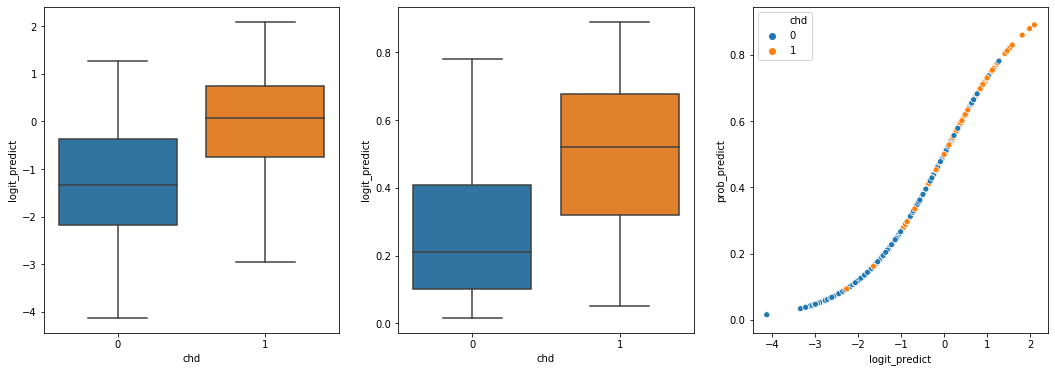

In [36]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
prob_predict = log_reg.predict(X)
logit_predict = np.log(prob_predict/(1-prob_predict))
sns.boxplot(Y, logit_predict)
plt.ylabel('logit_predict')

plt.subplot(1, 3, 2)
sns.boxplot(Y, prob_predict)
plt.ylabel('logit_predict')

plt.subplot(1, 3, 3)
sns.scatterplot(logit_predict, prob_predict, hue=Y)
plt.xlabel('logit_predict')
plt.ylabel('prob_predict');